Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 no

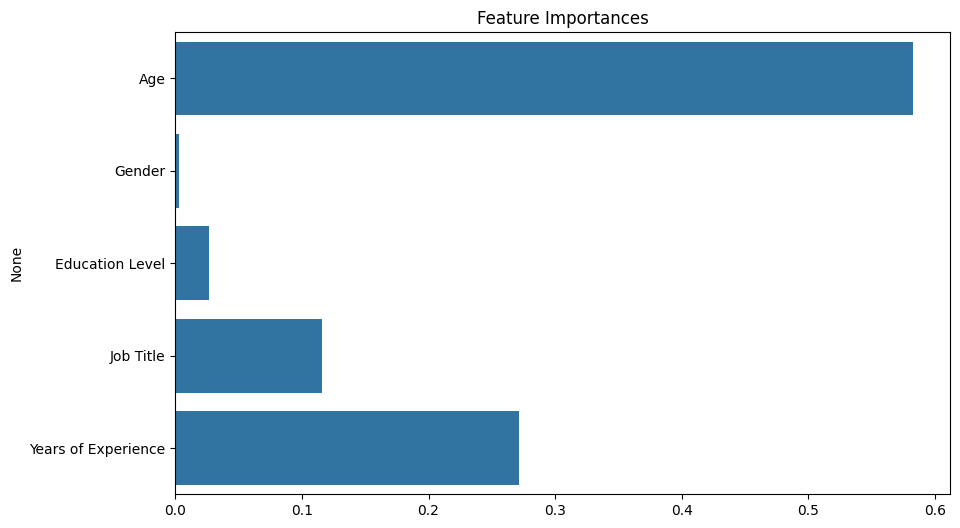


✅ Model and Scaler saved as 'model.pkl' and 'scaler.pkl'


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


# Mount Google Drive
drive.mount('/content/drive')

# Define file path from google drive
file_path = "/content/drive/My Drive/ML/Salary Data.csv"

# Load the dataset
df = pd.read_csv(file_path)  # Change the filename as per your dataset

# Display basic info
print(df.head())
print(df.info())

# Handle missing values (if any)
df = df.dropna()

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature importance plot
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.show()

model_path = "/content/drive/My Drive/ML/model.pkl"
scaler_path = "/content/drive/My Drive/ML/scaler.pkl"

# Save the model and scaler as pickle files
with open(model_path, "wb") as model_file:
    pickle.dump(model, model_file)

with open(scaler_path, "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\n✅ Model and Scaler saved as 'model.pkl' and 'scaler.pkl'")


In [5]:
import streamlit as st
import pickle
import numpy as np
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

model_path = "/content/drive/My Drive/ML/model.pkl"
scaler_path = "/content/drive/My Drive/ML/scaler.pkl"

# Load trained model and scaler
model = pickle.load(open(model_path, "rb"))
scaler = pickle.load(open(scaler_path, "rb"))

st.title("Salary Prediction App")

# Example inputs
education = st.selectbox("Education Level", ["Bachelor", "Master", "PhD"])
experience = st.slider("Years of Experience", 0, 30, 5)

# Encode and scale input
education_encoded = {"Bachelor": 0, "Master": 1, "PhD": 2}[education]
features = np.array([[education_encoded, experience]])
features_scaled = scaler.transform(features)

# Predict
if st.button("Predict Salary"):
    prediction = model.predict(features_scaled)[0]
    st.success(f"Estimated Salary: ₹{prediction:,.2f}")


ModuleNotFoundError: No module named 'streamlit'